In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('whitegrid')

# path to data folder
PATH = r'C:\Users\Никита\Андан\Project\data'

# Content
* [Macro data](#macro-data)
* [Relations of macro data and daily stock markets](#relations-of-macro-data-and-daily-stock-markets)
  * [Testing relations](#testing-relations)
  * [New macro variables](#new-macro-variables)
  * [Relation with interest rates](#relation-with-interest-rates)
  * [Correlation testing](#correlation-testing)

# Macro data

In this section brief analysis of Russian macro data will be provided. Focal point of the analysis below is identification of useful features for forecasting stock prices. 

## Financial assets and obligations of households

All data is given at the reporting data in billions of rubles. Monthly data.

**Key findings:**
1. Investment activity (Fig. 1) is stable over time and a share of stocks in household's assets increases.
2. The most preferrable asset is deposits (Fig. 3), whose amount is increasing and always above credit level. Thus, households always save more than borrow from financial instutions. The rest of liquidity come to financial market through banks.
3. Cash rate (Cash/Deposits) shows a rapid change (Fig. 2) and can be useful feature. As cash rate increases, less money enter the financial market and less volatility is expected.  

In [2]:
df = pd.read_csv(os.path.join(PATH, r'macro\households_bm_processed.csv'))
df['date'] = pd.to_datetime(df['date'])

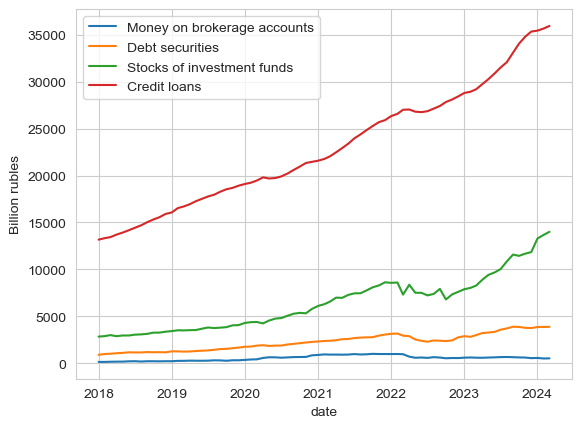

In [14]:
# Fig. 1
# investment activity VS credit loans

sns.lineplot(df, x = 'date', y = 'Денежные средства на брокерских счетах', label = 'Money on brokerage accounts')
sns.lineplot(df, x = 'date', y = 'Долговые ценные бумаги', label = 'Debt securities' )
sns.lineplot(df, x = 'date', y = 'Котируемые акции и паи и акции инвестиционных фондов', label = 'Stocks of investment funds')
sns.lineplot(df, x = 'date', y = 'Кредиты кредитных организаций', label = 'Credit loans')
plt.ylabel('Billion rubles')
plt.legend();

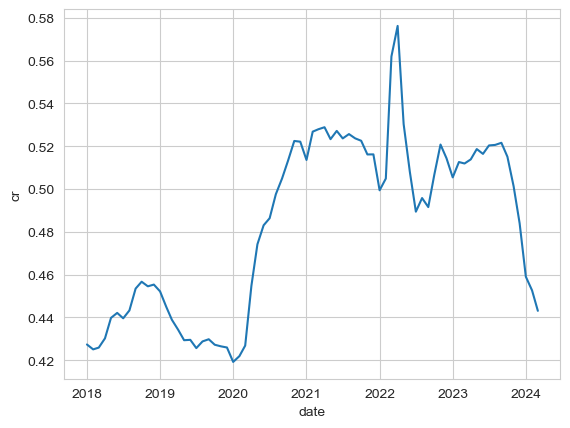

In [17]:
# Fig. 2
# cr

df['cr'] = (df['Наличная национальная валюта'] + df['Наличная иностранная валюта']) / df['Депозиты']

sns.lineplot(df, x = 'date', y = 'cr');

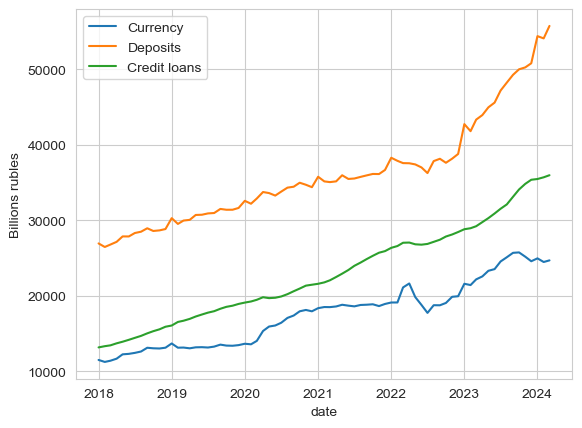

In [19]:
# Fig. 3
df['currency'] = df['Наличная национальная валюта'] + df['Наличная иностранная валюта']

sns.lineplot(df, x = 'date', y = 'currency', label = 'Currency')
sns.lineplot(df, x = 'date', y = 'Депозиты', label = 'Deposits')
sns.lineplot(df, x = 'date', y = 'Кредиты кредитных организаций', label = 'Credit loans')
plt.ylabel('Billions rubles')
plt.legend();

## Debt of nonfinancial sector and households

In millions of rubles. Quarterly data

Domestic borrowings of non-financial corporations include debt on loans provided by credit institutions and debt securities issued on the domestic market. Debt on debt securities is accounted for at face value less debt securities repurchased by issuers.

Domestic household borrowing includes bank loan debt.

External borrowings of non-financial corporations include debt securities in the portfolio of non-residents (including debt on promissory notes), as well as debt on loans and borrowings to non-residents, excluding debt on repo transactions.

The external borrowings of households consist of debt on loans and borrowings and debt securities to non-residents. [Source and extended analysis](https://www.cbr.ru/statistics/macro_itm/dkfs/ext_dep_indicator/#:~:text=%D0%9C%D0%B0%D0%BA%D1%80%D0%BE%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0-,%D0%A0%D0%B0%D1%81%D1%88%D0%B8%D1%80%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9%20%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%20%D0%B4%D0%BE%D0%BB%D0%B3%D0%B0%20%D0%BD%D0%B5%D1%84%D0%B8%D0%BD%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE%20%D1%81%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%B0%20%D0%B8%20%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B8%D1%85%20%D1%85%D0%BE%D0%B7%D1%8F%D0%B9%D1%81%D1%82%D0%B2,%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%B8%D0%BB%20119%2C6%20%D1%82%D1%80%D0%BB%D0%BD%20%D1%80%D1%83%D0%B1%D0%BB%D0%B5%D0%B9.)

**Key findings**
1. If we connect financial obligations with investment activity in real assets, it'll be clear (Fig. 4) that investments have increased since 2013. Such connection is based on the following mechanism: firms increase their investment demand and financial obligations as a consequence.
2. In the borrowings structure internal sources are dominating. While external sources are not expecting to change, internal ones increase over time. We suppose internal/external coefficient can be impactful for investment activity. Increased investment demand can be filled either by domestic financial market or foreign borrowings. With coefficient decreasing we expect investment activity to slow down or structure of borrowings to change, in each of the options liqudity on domestic financial market is going down.

In [38]:
df_debt = pd.read_csv(os.path.join(PATH, r'macro\nonfinancial_sector_households_debt_extended_processed.csv'))
df_debt['date'] = pd.to_datetime(df_debt['date'])

new_cols = [col.strip() for col in df_debt.columns]
df_debt = df_debt.set_axis(new_cols, axis = 1)

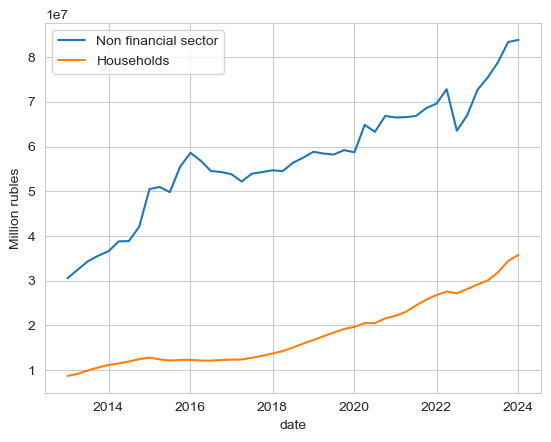

In [39]:
# Fig. 4
# debt of financial sector and households

sns.lineplot(df_debt, x = 'date', y = 'Нефинансовый сектор', label = 'Non financial sector')
sns.lineplot(df_debt, x = 'date', y = 'Домашние хозяйства и НКООДХ', label = 'Households')
plt.ylabel('Million rubles')
plt.legend();

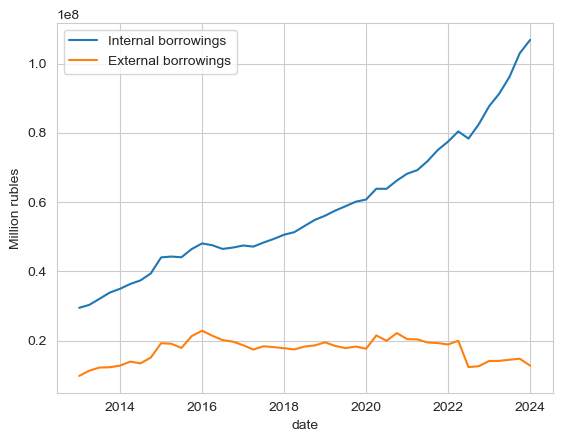

In [40]:
# Fig.5
# Internal and external borrowings

df_debt['internal'] = df_debt['Внутренние заимствования'] + df_debt['Внутренние заимствования.1']
df_debt['external'] = df_debt['Внешние заимствования'] + df_debt['Внешние заимствования.1']

sns.lineplot(df_debt, x = 'date', y = 'internal', label = 'Internal borrowings')
sns.lineplot(df_debt, x = 'date', y = 'external', label = 'External borrowings')
plt.ylabel('Million rubles')
plt.legend();

## Monetary supply

Billions of rubles. Monthly data.

Change in monetary supply can be a proxi variable for changes in financial market. M2 includes deposits of corporations and households and currency. Broad monetary supply also contains deposits in foreign currency. Thus, we consider percentage change in these indicator (Fig. 6) impactful for predicting financial market . 

In [3]:
df_monetary = pd.read_csv(os.path.join(PATH, r'macro\monetary_agg_processed.csv'))
df_monetary['date'] = pd.to_datetime(df_monetary['date'])

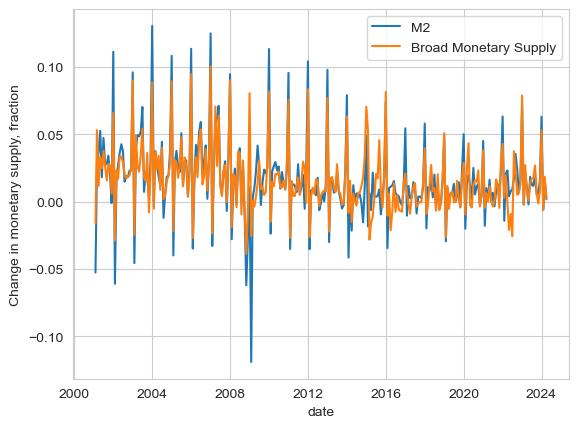

In [6]:
# Fig. 6
# Percentage change in monetary supply

df_monetary['change in M2'] = df_monetary['Денежный агрегат М2'].pct_change()
df_monetary['change in broad_ms'] = df_monetary['Широкая денежная масса'].pct_change()


sns.lineplot(df_monetary, x = 'date', y = 'change in M2', label = 'M2')
sns.lineplot(df_monetary, x = 'date', y = 'change in broad_ms', label = 'Broad Monetary Supply')
plt.ylabel('Change in monetary supply, fraction');

# Relations of macro data and daily stock markets

## Testing relations

The first scope in this section is to determine whether macro data is correlated and useful for prediction stock prices. For this purpose Granger casuality test was used. All test are held on fintech stocks assuming that for other stocks relation also exists.  

Let $x_t,y_t$ be time series. For lag $l$ suppose one of linear relations:
$$
x_t = a_0 + a_1 x_{t-1} + \ldots + a_l x_{t-l} + b_0 + b_1 y_{t-1} + \ldots + b_l y_{t-l} + \epsilon_t
$$
$$
y_t = c_0 + c_1 x_{t-1} + \ldots + c_l x_{t-l} + d_0 + d_1 y_{t-1} + \ldots + d_l x_{t-l} + \epsilon_t
$$

it tests two hypotheses consequently:
$$
H_0 : b_1 = b_2 = \ldots = b_l = 0
$$
$$
H_1 : c_1 = c_2 = \ldots = c_l = 0
$$

[In more detail](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%93%D1%80%D1%8D%D0%BD%D0%B4%D0%B6%D0%B5%D1%80%D0%B0_%D0%BD%D0%B0_%D0%BF%D1%80%D0%B8%D1%87%D0%B8%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D1%8C), [about application of Granger test](http://jmlda.org/papers/doc/2011/no1/Motrenko2011Granger.pdf).

As Granger test requires stationary time series, prices and macro variables were differentiated. 

**Results**

We find *strong relation between some time series (differentiated stocks and macro data) for different lags*. It is not known whether macro data influence on stock prices or on the contrary, but potentially daily macro data can be useful for stock prices.      

In [7]:
# fintech

fintech = pd.read_csv(os.path.join(PATH, r'final_datasets\final_fintech.csv'))
fintech['date'] = pd.to_datetime(fintech['date'])

ticker_names = [ticker_name[:-4] for ticker_name in os.listdir(os.path.join(PATH, 'fintech'))]
ticker_names_ru = [ticker_name for ticker_name in ticker_names if ticker_name[-2:] == 'RU']

In [8]:
# setting index

fintech = fintech.sort_values('date')
fintech.set_index('date', inplace = True)

# fintech_monthly = fintech.resample('M').last()
# fintech_monthly.reset_index(inplace = True)

In [17]:
macro_vars = ['Debt of the non-financial sector and households, total',
       'Non-financial sector, total',
       'Internal borrowings, non-financial sector', 'Credits',
       'Debt securities in the residents portfolio',
       'External borrowings, non-financial sector',
       'Loans and borrowings received from non-residents',
       'Debt securities in the portfolio of non-residents, including promissory notes',
       'Households and NPOs, total', 'Internal borrowings, households',
       'External borrowings, households', 'real_gdp_usa', 'm0_ru',
       'm1_ru', 'm2_ru', 'broad_money_supply_ru',
       'Cash national currency', 'Foreign currency in cash', 'Deposits',
       'Cash on brokerage accounts', 'Debt securities',
       'Quoted shares and units and shares of investment funds',
       'Loans from credit institutions']

ticker_cols = [col for col in fintech.columns if 'close' in col and col[6:] in ticker_names_ru]
# fintech_monthly = fintech_monthly[ticker_cols + macro_vars]

In [14]:
from statsmodels.tsa.stattools import grangercausalitytests
from IPython.display import clear_output

def check_granger_casuality(df, first_cols, second_cols):
    '''
    Checks casuality with Granger test for all columns in first_cols
    against all columns in second_cols
    
    df: pd.DataFrame to check casuality
    first_cols: str[]
    second_cols: str[]

    returns
    dict{lag: first_col:{second_col: p_value for ssr F test}, ...}
    '''
    lags = 12
    results = {}

    for lag in range(1, lags + 1): 
        lag_dict = {}  
        for first_col in first_cols:
            first_col_dict = {}
            for second_col in second_cols:
                result = grangercausalitytests(df[[first_col, second_col]].diff().bfill(), maxlag=[lag])
                clear_output(wait=True)
                p_value = result[lag][0]['ssr_ftest'][1]
                first_col_dict[second_col] = p_value 
            lag_dict[first_col] = first_col_dict  
        results[lag] = lag_dict  
    return results

In [20]:
results = check_granger_casuality(fintech, ticker_cols, macro_vars)
df_results = pd.DataFrame(results[2])
min_value = df_results.min().min()

min_row, min_col = divmod(df_results.values.argmin(), df_results.shape[1])
min_row = df_results.index[min_row]
min_col = df_results.columns[min_col]
print('Minimal p_value:', min_value)
print(f'{min_row} x {min_col}')

Minimal p_value: 3.543874433351286e-05
Cash on brokerage accounts x close_RGSS_RU


In [22]:
def normalize_ts(ts):
    '''
    Min-max normalization for time series in 1d-array
    '''
    ts = (ts - ts.min()) / (ts.max() - ts.min())
    return ts

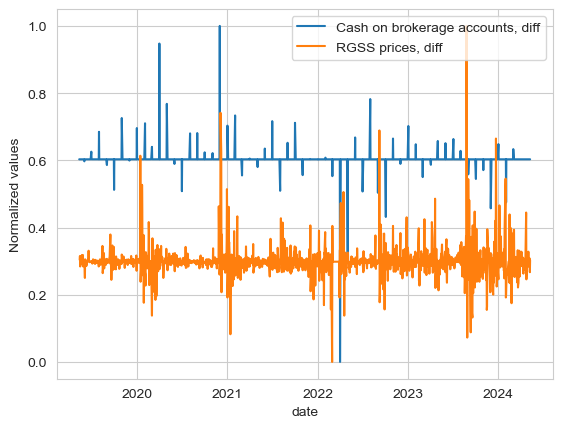

In [24]:
# for instance, visualize some random relation
ts_1 = normalize_ts(fintech['Cash on brokerage accounts'].diff())
ts_2 = normalize_ts(fintech['close_RGSS_RU'].shift(2).diff())

sns.lineplot(x = fintech.index, y = ts_1, label = 'Cash on brokerage accounts, diff')
sns.lineplot(x = fintech.index, y = ts_2, label = 'RGSS prices, diff')
plt.ylabel('Normalized values')
plt.legend();

## New macro variables

We add new macro variables that also can influence on daily prices.

- `cr` - cash ratio = Cash / Deposits. 
- `Internal/External debt`
- `credits/deposits`
- `market_money/monetary_supply`. Market money includes debt securities, cash on brokerage accounts and shares of investment funds held by households.
- `m2_pct_change` - percentage change (in fraction) of M2 monetay aggregate supply.
- `broad_pct_change` - percentage change of broad monetary supply.

For all variables a significant importance was found for particular lags. So, they will be included in final dataset.

In [18]:
# new macro variables
new_macro_vars = ['cr', 'Internal/External debt', 
                  'credits/deposits', 'market_money/monetary_supply', 'm2_pct_change']


fintech['cr'] = fintech['Cash national currency'] / fintech['Deposits']
fintech['Internal/External debt'] = (fintech['Internal borrowings, non-financial sector'] + fintech['Internal borrowings, households']) / \
                                    (fintech['External borrowings, non-financial sector'] + fintech['External borrowings, households'])
fintech['credits/deposits'] = fintech['Credits'] / fintech['Deposits']
fintech['market_money/monetary_supply'] = (fintech['Debt securities'] + fintech['Cash on brokerage accounts'] + \
                                           fintech['Quoted shares and units and shares of investment funds']) / fintech['broad_money_supply_ru']
fintech['m2_pct_change'] = fintech['m2_ru'].pct_change().bfill()
fintech['broad_pct_change'] = fintech['broad_money_supply_ru'].pct_change().bfill()

In [19]:
results = check_granger_casuality(fintech, ticker_cols, new_macro_vars)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.1416  , p=0.3216  , df_denom=1267, df_num=12
ssr based chi2 test:   chi2=13.9697 , p=0.3026  , df=12
likelihood ratio test: chi2=13.8948 , p=0.3075  , df=12
parameter F test:         F=1.1416  , p=0.3216  , df_denom=1267, df_num=12


In [20]:
df_results = pd.DataFrame(results[2])
min_value = df_results.min().min()

min_row, min_col = divmod(df_results.values.argmin(), df_results.shape[1])
min_row = df_results.index[min_row]
min_col = df_results.columns[min_col]
print('Minimal p_value:', min_value)
print(f'{min_row} x {min_col}')

Minimal p_value: 5.7666892010110626e-05
m2_pct_change x close_AVAN_RU


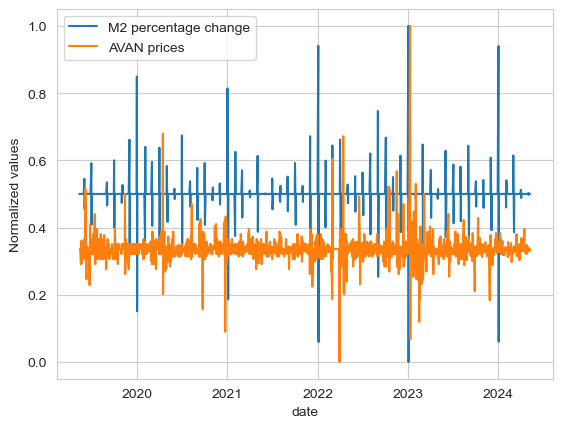

In [23]:
ts_1 = normalize_ts(fintech['m2_pct_change'].diff())
ts_2 = normalize_ts(fintech['close_AVAN_RU'].diff().shift(2))

sns.lineplot(x = fintech.index, y = ts_1, label = 'M2 percentage change')
sns.lineplot(x = fintech.index, y = ts_2, label = 'AVAN prices')
plt.ylabel('Normalized values')
plt.legend();

## Relation with interest rates

Interest rates have specific in determine prices change. Unlike the other variables they are strongly determined by the governemnt (EFFR is target for FRS) or banks (Interbank credit market rates). This explains a rapid change in second rate and step-like changing in the first one (Fig. below). Thus, if we find relation with stock prices, this most likely mean that *rates affect prices* (or random relation was found). 

Indeed, with some prices there is a strong relation even with day lag (`lag` = 1).

In [33]:
rates_cols = ['Interbank credit market rates', 'effr']
ticker_cols = [col for col in fintech.columns if 'close' in col and col[6:] in ticker_names]

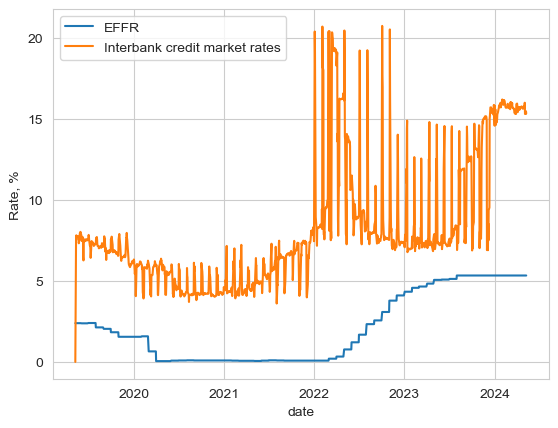

In [34]:
# Plotting interest rates

sns.lineplot(fintech, x = fintech.index, y = 'effr', label = 'EFFR')
sns.lineplot(fintech, x = fintech.index, y = 'Interbank credit market rates', label = 'Interbank credit market rates')
plt.ylabel('Rate, %')
plt.legend();

In [35]:
results = check_granger_casuality(fintech, ticker_cols, rates_cols)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=3.0518  , p=0.0003  , df_denom=1267, df_num=12
ssr based chi2 test:   chi2=37.3444 , p=0.0002  , df=12
likelihood ratio test: chi2=36.8149 , p=0.0002  , df=12
parameter F test:         F=3.0518  , p=0.0003  , df_denom=1267, df_num=12


In [37]:
# for lag = 1
# In some positions there is a strong relation
df_results = pd.DataFrame(results[2])
min_value = df_results.min().min()

min_row, min_col = divmod(df_results.values.argmin(), df_results.shape[1])
min_row = df_results.index[min_row]
min_col = df_results.columns[min_col]
print('Minimal p_value:', min_value)
print(f'{min_row} x {min_col}')
df_results

Minimal p_value: 0.004354021864067928
effr x close_AIZ_USA


close_ACGL_USA  close_AFG_USA  close_AFL_USA  \
Interbank credit market rates        0.710664       0.432311       0.868099   
effr                                 0.361803       0.412584       0.066328   

                               close_AIG_USA  close_AIZ_USA  close_AJG_USA  \
Interbank credit market rates       0.603860       0.715557       0.920421   
effr                                0.460231       0.004354       0.445437   

                               close_ALLY_USA  close_ALL_USA  close_AMP_USA  \
Interbank credit market rates        0.826256       0.181757       0.436410   
effr                                 0.736430       0.579095       0.321509   

                               close_AON_USA  ...  close_TW_USA  \
Interbank credit market rates       0.085046  ...      0.881016   
effr                                0.225719  ...      0.211123   

                               close_UNM_USA  close_USBN_RU  close_USB_USA  \
Interbank credit market rates       0.767638       0.602983       0.736988   
effr                                0.052072       0.928128       0.637368   

                               close_VTBR_RU  close_V_USA  close_WFC_USA  \
Interbank credit market rates       0.649284     0.454982       0.816156   
effr                                0.844183     0.933625       0.844284   

                               close_WRB_USA  close_WTCM_RU  close_WTW_USA  
Interbank credit market rates       0.685927       0.189991       0.224242  
effr                                0.817190       0.183989       0.295312  

[2 rows x 105 columns]

## Correlation testing

The goal of this section is to test another kind relation of gdp, effr and stock prices. These indicators change slowly and step-like. They are observed by investors and traders who make market decisions. We want to test whether the change itself correlated with prices with some lag.

Let us describe it more formally. Suppose we have index $y_t$ and variable $x_t$, $T = {t_1, t_2, \ldots, t_n}$ - set of times in which $y_t$ changed. For lag $l$ we test
$$
H_0: corr(y_{t+l} - y_t, x_t) = 0, \forall t \in T
$$
$$
H_1: corr(y_{t+l} - y_t, x_t) \neq 0, \forall t \in T
$$

As you can see on interactive heatmap, there is a significant correlation of changes in indicators and price changes. 

In [18]:
target_cols = ['real_gdp_usa', 'daily_gdp', 'daily_gdp_no_season', 'effr']

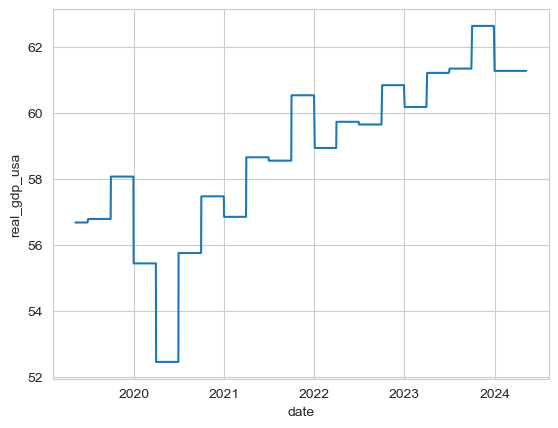

In [20]:
sns.lineplot(fintech, x = fintech.index, y = 'real_gdp_usa');

In [51]:
from scipy.stats import pearsonr

def check_correlation(df, first_cols, second_cols):
    '''
    Function checks stastistical significance of lagged correlation
    between each column in first_cols and each column in second_cols

    df: pd.DataFrame with datetime index
    first_cols: str[]
    second_cols: str[]

    returns
    dict {lag: first_col: {second_col: p_value}}
    '''
    lags = np.arange(-120,120)
    results = {lag: {first_col: {} for first_col in first_cols} for lag in lags}

    change_times = {}
    for col in second_cols:
        change_times[col] = df[col].diff().fillna(0) != 0

    for lag in tqdm(lags):
        for first_col in first_cols:
            for second_col in second_cols:
                changed_times = df.index[change_times[second_col]]
                
                shifted_times = changed_times + pd.to_timedelta(lag, unit='D')
                
                # Shifted indices of vars in first_cols
                valid_times = shifted_times.intersection(df.index)
                valid_changed_times = valid_times - pd.to_timedelta(lag, unit='D')

                if not valid_times.empty:
                    first_col_values = df.loc[valid_times, first_col]
                    second_col_values = df.loc[:, second_col].diff()[valid_changed_times]

                    if len(first_col_values) > 1:  # Checking for valid data
                        corr, p_value = pearsonr(first_col_values, second_col_values)
                        results[lag][first_col][second_col] = p_value
                    else:
                        results[lag][first_col][second_col] = np.nan
                else:
                    results[lag][first_col][second_col] = np.nan

    return results

In [52]:
results = check_correlation(fintech, ticker_cols, target_cols)

  0%|          | 0/240 [00:00<?, ?it/s]

In [24]:
import plotly.graph_objects as go
import numpy as np

def create_interactive_heatmap(p_values):
    '''
    Function creates interactive heatmap for different lags.

    p_values: dict{lag: {first_col: {second_col: p_value}, ...}, ...}
    '''
    lags = sorted(p_values.keys())
    all_first_cols = list(p_values[lags[0]].keys())
    second_cols = list(p_values[lags[0]][all_first_cols[0]].keys())

    frames = []
    for lag in lags:
        p_value_list = []
        for first in all_first_cols:
            for second in second_cols:
                p_value = p_values[lag][first][second]
                if not np.isnan(p_value):
                    p_value_list.append((first, second, p_value))
        
        # Finding top-10 colums with lowest p_value
        p_value_list.sort(key=lambda x: x[2])
        top_10_first = sorted(set([x[0] for x in p_value_list[:10]]))
        
        # Matrix for heatmap
        z = np.array([[p_values[lag][first][second] if first in top_10_first else np.nan for second in second_cols] for first in all_first_cols])
        
        frame = go.Frame(
            data=go.Heatmap(
                z=z,
                x=second_cols,
                y=all_first_cols,
                coloraxis="coloraxis",
                text=[[f"p={p:.3f}" if not np.isnan(p) else "" for p in row] for row in z],
                hoverinfo="text"
            ),
            name=f"lag_{lag}"
        )
        frames.append(frame)
    
    
    initial_p_value_list = []
    for first in all_first_cols:
        for second in second_cols:
            p_value = p_values[lags[0]][first][second]
            if not np.isnan(p_value):
                initial_p_value_list.append((first, second, p_value))
    
    initial_p_value_list.sort(key=lambda x: x[2])
    initial_top_10_first = sorted(set([x[0] for x in initial_p_value_list[:10]]))
    
    initial_z = np.array([[p_values[lags[0]][first][second] if first in initial_top_10_first else np.nan for second in second_cols] for first in all_first_cols])
    
    fig = go.Figure(
        data=go.Heatmap(
            z=initial_z,
            x=second_cols,
            y=all_first_cols,
            coloraxis="coloraxis",
            text=[[f"p={p:.3f}" if not np.isnan(p) else "" for p in row] for row in initial_z],
            hoverinfo="text"
        ),
        layout=go.Layout(
            title="Top n Lowest P-value Heatmap for Different Lags",
            height=600,  
            width=400,
            updatemenus=[{
                "buttons": [
                    {
                        "args": [None, {"frame": {"duration": 500, "redraw": True},
                                        "fromcurrent": True}],
                        "label": "Play",
                        "method": "animate"
                    },
                    {
                        "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                          "mode": "immediate",
                                          "transition": {"duration": 0}}],
                        "label": "Pause",
                        "method": "animate"
                    }
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 87},
                "showactive": False,
                "type": "buttons",
                "x": 0.1,
                "xanchor": "right",
                "y": 0,
                "yanchor": "top"
            }],
            sliders=[{
                "active": 0,
                "yanchor": "top",
                "xanchor": "left",
                "currentvalue": {
                    "font": {"size": 20},
                    "prefix": "Lag: ",
                    "visible": True,
                    "xanchor": "right"
                },
                "transition": {"duration": 500},
                "pad": {"b": 10, "t": 50},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [{
                    "args": [[f"lag_{lag}"], {"frame": {"duration": 500, "redraw": True},
                                               "mode": "immediate",
                                               "transition": {"duration": 500}}],
                    "label": str(lag),
                    "method": "animate"
                } for lag in lags]
            }]
        ),
        frames=frames
    )
    
    fig.update_layout(coloraxis={'colorscale':'Viridis'})
    fig.show()

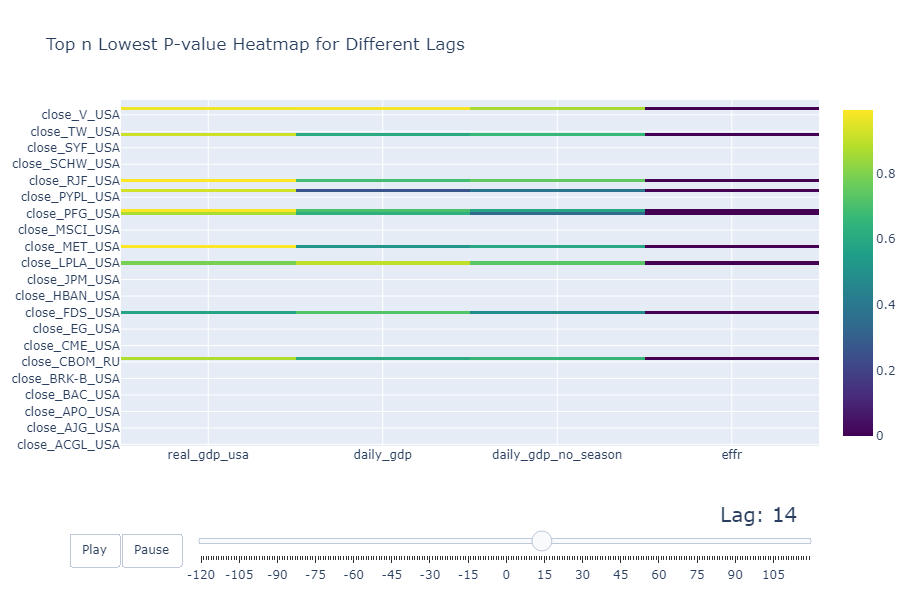

In [54]:
create_interactive_heatmap(results)